<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 20px; text-align: left; line-height: 1.5;">
    Universidade Federal da Bahia (UFBA)
    <br>
    Departamento de Engenharia Elétrica e da Computação (DEEC)
    <br>
    Disciplina: ENGG64 - Visão Computacional
    <br>
    Docente: André Gustavo Scolari Conceição
    <br>
    Discente: Gabriel Correia
</div>


---

ED10 - TRANSFORMADA DE HOUGH

Resultados Obtidos no Programa: 


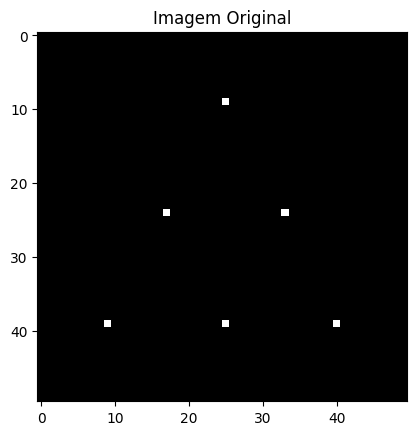

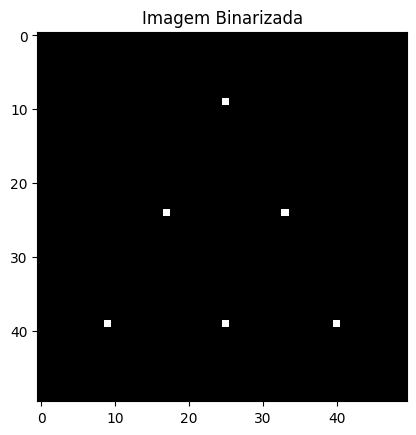

Coordenadas dos Pontos Brancos:
[[ 9 25]
 [24 17]
 [24 33]
 [39  9]
 [39 25]
 [39 40]]


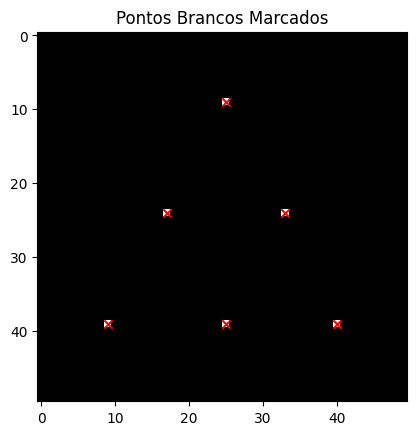

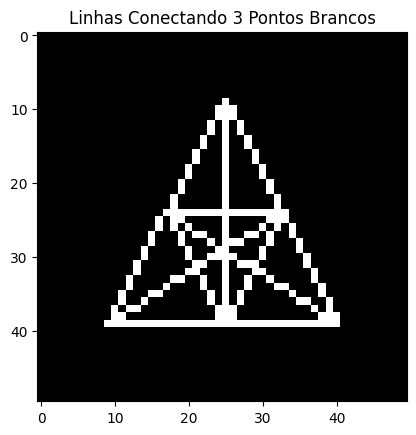

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

plt.close('all')
print('Resultados Obtidos no Programa: ')

### Lendo a Imagem original e fazendo o tratamento preliminar
# Leitura da imagem "piramide.png"
piramide = cv2.imread("piramide.png", cv2.IMREAD_GRAYSCALE)

# Aplicar um limiar (Threshold) para obter uma imagem binária
_, binary_piramide = cv2.threshold(piramide, 127, 255, cv2.THRESH_BINARY)

# Encontrar coordenadas dos pontos brancos na imagem binarizada (semelhante aos Centróides do ED9-Momentos-GCorreia.ipynb)
white_points_coords = np.column_stack(np.where(binary_piramide == 255))

### Desenhando todas as Linhas possíveis na Imagem Original
# Criar uma imagem em branco para desenhar as linhas
output_image = np.zeros_like(piramide)

# Conectar todos os agrupamentos de 3 pontos por uma linha
for triple in combinations(white_points_coords, 3):
    for i in range(2):
        point1 = tuple(triple[i][::-1])  # Inverter as coordenadas para (x, y)
        point2 = tuple(triple[i + 1][::-1])
        cv2.line(output_image, point1, point2, 255, 1)

    # Conectar o último ponto ao primeiro para formar um triângulo
    point3 = tuple(triple[2][::-1])
    cv2.line(output_image, point2, point3, 255, 1)
    cv2.line(output_image, point3, point1, 255, 1)

### Plotando as informações obtidas no código
# Exibir a imagem original
plt.figure()
plt.imshow(piramide, cmap='gray')
plt.title('Imagem Original')
plt.show()

# Exibir a imagem binarizada
plt.figure()
plt.imshow(binary_piramide, cmap='gray')
plt.title('Imagem Binarizada')
plt.show()

# Exibir as coordenadas dos pontos brancos
print('Coordenadas dos Pontos Brancos:')
print(white_points_coords)

# Exibir as coordenadas dos pontos brancos
plt.figure()
plt.imshow(piramide, cmap='gray')
plt.scatter(white_points_coords[:, 1], white_points_coords[:, 0], color='red', marker='x')
plt.title('Pontos Brancos Marcados')
plt.show()

# Exibir a nova imagem com as linhas conectando os pontos
plt.figure()
plt.imshow(output_image, cmap='gray')
plt.title('Linhas Conectando 3 Pontos Brancos')
plt.show()
